In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Znaczenie kolumn


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [55]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

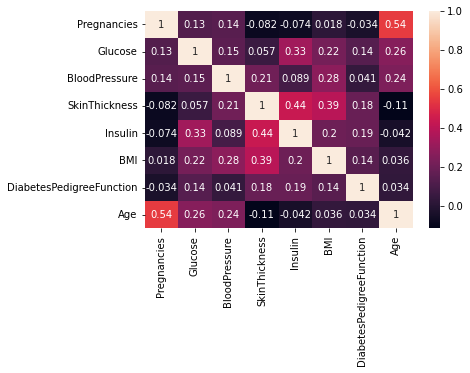

In [59]:
sns.heatmap(data.corr(), annot=True)

# Wyszukanie braków w danych

In [37]:
for col in data.columns:
    print("_____" + col + "______")
    print("Dane o wartości 0:   %i" % data[data[col] == 0].shape[0])
    print("Dane o wartości NaN: %i" % data[col].isna().sum())

#len(data[data.Glucose == 0])
#data.Glucose.isna().sum()

_____Pregnancies______
Dane o wartości 0:   111
Dane o wartości NaN: 0
_____Glucose______
Dane o wartości 0:   5
Dane o wartości NaN: 0
_____BloodPressure______
Dane o wartości 0:   35
Dane o wartości NaN: 0
_____SkinThickness______
Dane o wartości 0:   227
Dane o wartości NaN: 0
_____Insulin______
Dane o wartości 0:   374
Dane o wartości NaN: 0
_____BMI______
Dane o wartości 0:   11
Dane o wartości NaN: 0
_____DiabetesPedigreeFunction______
Dane o wartości 0:   0
Dane o wartości NaN: 0
_____Age______
Dane o wartości 0:   0
Dane o wartości NaN: 0
_____Outcome______
Dane o wartości 0:   500
Dane o wartości NaN: 0


Wartości danych Pregnancies, DiabetesPedigreeFunction oraz Outcome mogą być równe 0, dlatego nie ma potrzeby ich edytować. Natomiast kolumny Glucose, BloodPressure, SkinThickness, Insulin oraz BMI nie mogą przyjmować wartości 0, dlatego wymagają wstawienia sztucznych danych.

W przypadku kolumn Glucose oraz BMI ilość wartości zerowych jest na tyle niewielka, że można po prostu wyrzucić niepełne wiersze.

In [100]:
imputated_data = data.copy()
imputated_data = imputated_data[imputated_data["Glucose"] != 0]
imputated_data = imputated_data[imputated_data["BMI"] != 0]
imputated_data.shape

(752, 9)

In [96]:
fixed_data = data.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    fixed_data[col] = fixed_data[col].replace(0, fixed_data[col].mean())
fixed_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Figure size 720x720 with 0 Axes>

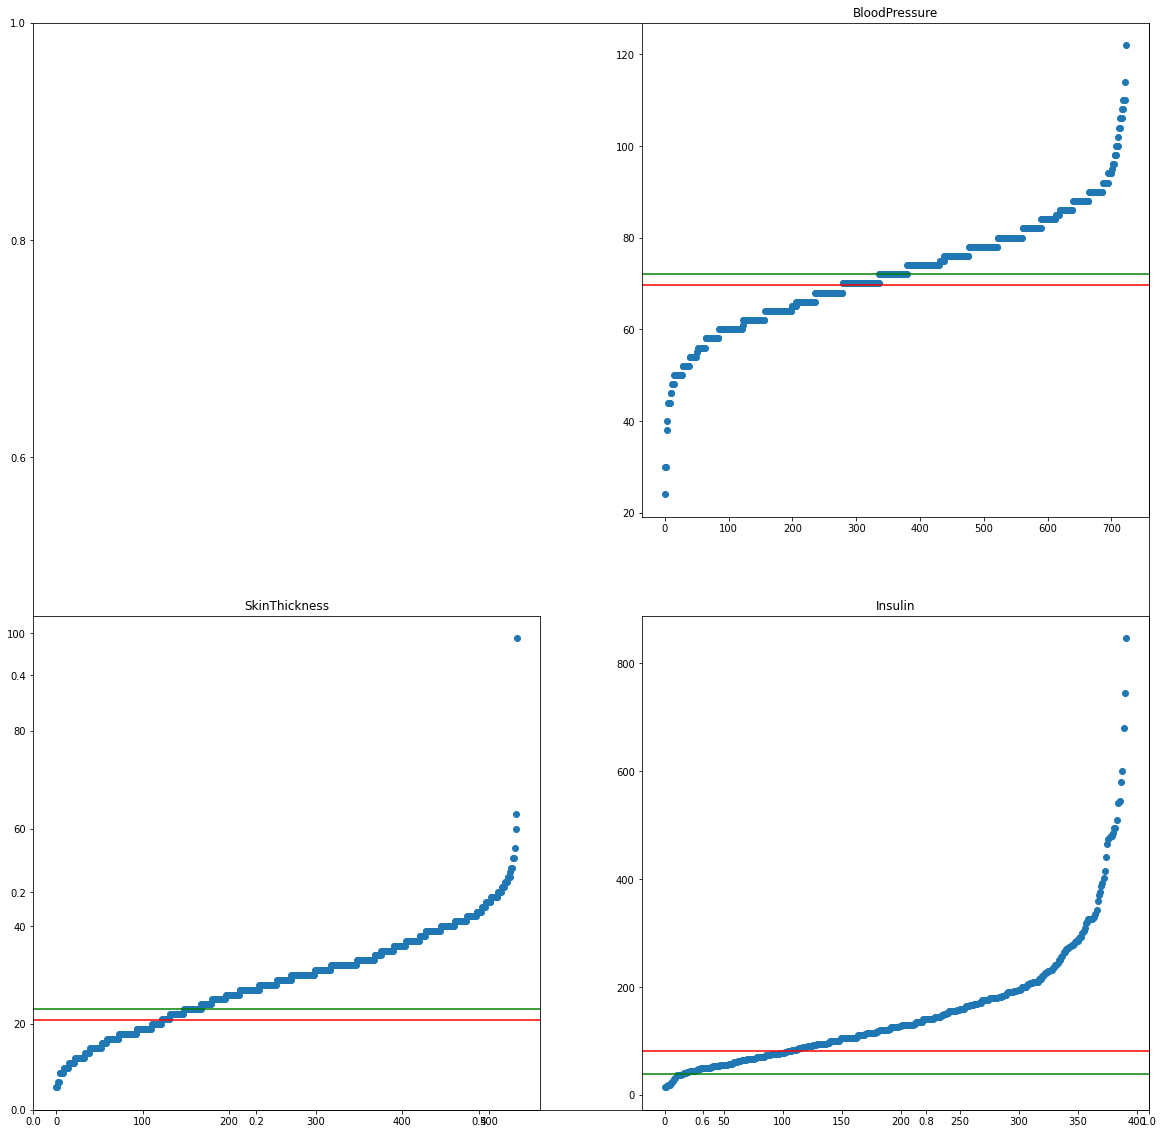

In [150]:
fig=plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)
for idx, col in enumerate(["BloodPressure", "SkinThickness", "Insulin"]):
    ax = fig.add_subplot(2,2,idx+1)
    plot_data = imputated_data[imputated_data[col] != 0][col].sort_values().reset_index()[col]
    ax.scatter(plot_data.index, plot_data)
    mean = imputated_data[col].mean()
    median = imputated_data[col].median()
    ax.axline((0,mean), slope=0, color="red")
    ax.axline((0,median), slope=0, color="green")
    ax.set_title(col)